<a href="https://colab.research.google.com/github/supragyabajpai/Coursera_Capstone/blob/master/Spotify_HC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd

In [37]:
dataset_path = '/content/drive/MyDrive/Schulich MBAN/Sem- 1/Data Science/FInal proect/spotify_data.csv'

In [38]:
df = pd.read_csv(dataset_path)

In [39]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [40]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [41]:
df.drop(df[df['year'] <= 2018].index, inplace = True)

In [42]:
df.drop(df[df['genre'] == 'songwriter'].index, inplace = True)

In [43]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
365885,Penny and Sparrow,Eloise,3XnDbrxxtA40HPIIRWLgRT,58,2019,acoustic,0.606,0.415,7,-8.317,0,0.0475,0.6950,0.001490,0.1740,0.405,137.775,168713,4
365886,Penny and Sparrow,Don't Wanna Be Without Ya,0WSGIwIEqpfe3jGJ5fZsHr,55,2019,acoustic,0.651,0.860,7,-7.800,1,0.1380,0.6090,0.006460,0.0735,0.290,115.000,207763,4
365887,Joy Williams,Front Porch,5sVyefkGgQeYCgnqr4KslQ,61,2019,acoustic,0.567,0.224,1,-10.024,1,0.0299,0.8870,0.000000,0.1090,0.200,124.440,231813,4
365888,Wilder Woods,Supply & Demand,0tsUIJakq2RksuC1YixAHX,54,2019,acoustic,0.492,0.804,8,-5.053,1,0.0780,0.0273,0.000002,0.0710,0.574,159.956,196451,4
365889,Joy Williams,The Trouble with Wanting,5ZUObJNpVt2l9GogUSfALc,57,2019,acoustic,0.396,0.198,2,-9.096,1,0.0310,0.9120,0.000000,0.0972,0.190,138.624,235587,3


In [44]:
df['speechiness'].describe(include='all')

count    256761.000000
mean          0.096479
std           0.129801
min           0.000000
25%           0.038200
50%           0.052100
75%           0.092900
max           0.971000
Name: speechiness, dtype: float64

In [45]:
df.drop(df[df['speechiness'] == 0.000000].index, inplace = True)

In [46]:
df['E-D_Interaction'] = df['energy'] * df['danceability']

In [47]:
from numpy.lib.function_base import average
print("Min tempo: ", min(df['tempo']))
print("Max tempo: ", max(df['tempo']))
print("Avg tempo: ", average(df['tempo']))
print("------------------")
print(df['tempo'].describe(include='all'))

Min tempo:  31.237
Max tempo:  247.936
Avg tempo:  121.86748580404752
------------------
count    256552.000000
mean        121.867486
std          29.744859
min          31.237000
25%          99.619750
50%         122.526000
75%         140.011000
max         247.936000
Name: tempo, dtype: float64


I can divide the data into four quartiles on the basis of this.

In [48]:
bpm_ranges = {
    'slow': (0, 99.910000),
    'medium': (99.910000, 122.107000),
    'fast': (122.107000, 139.990000),
    'rapid': (139.990000, 249.993000)
}

In [49]:
# Function to categorize BPM into ranges
def categorize_bpm(tempo):
    for bpm_range, (min_bpm, max_bpm) in bpm_ranges.items():
        if min_bpm <= tempo < max_bpm:
            return bpm_range
    return 'unknown'

In [50]:
df['bpm_group'] = df['tempo'].apply(categorize_bpm)

In [51]:
df['I-S_Ratio'] = df['instrumentalness']/ df['speechiness']
# representing the balance between vocals and instrumental elements.

In [52]:
average_acousticness_by_genre = df.groupby('genre')['acousticness'].mean().reset_index()
average_acousticness_by_genre.rename(columns={'acousticness': 'average_acousticness'}, inplace=True)
df = df.merge(average_acousticness_by_genre, on='genre')

In [53]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'E-D_Interaction', 'bpm_group',
       'I-S_Ratio', 'average_acousticness'],
      dtype='object')

In [54]:
columns_to_drop = ['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre','key','mode','liveness','time_signature','energy','danceability','tempo']
df.drop(columns=columns_to_drop, inplace=True)

In [55]:
bpm_onehot = pd.get_dummies(df['bpm_group'], prefix='bpm',dtype=int)
df = pd.concat([df, bpm_onehot], axis=1)
df.drop(columns=['bpm_group'], inplace=True)

In [56]:
df.columns

Index(['loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'valence', 'duration_ms', 'E-D_Interaction', 'I-S_Ratio',
       'average_acousticness', 'bpm_fast', 'bpm_medium', 'bpm_rapid',
       'bpm_slow'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256552 entries, 0 to 256551
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loudness              256552 non-null  float64
 1   speechiness           256552 non-null  float64
 2   acousticness          256552 non-null  float64
 3   instrumentalness      256552 non-null  float64
 4   valence               256552 non-null  float64
 5   duration_ms           256552 non-null  int64  
 6   E-D_Interaction       256552 non-null  float64
 7   I-S_Ratio             256552 non-null  float64
 8   average_acousticness  256552 non-null  float64
 9   bpm_fast              256552 non-null  int64  
 10  bpm_medium            256552 non-null  int64  
 11  bpm_rapid             256552 non-null  int64  
 12  bpm_slow              256552 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 27.4 MB


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
columns_for_scaling = ['loudness', 'speechiness', 'acousticness', 'instrumentalness',
                       'valence', 'duration_ms', 'E-D_Interaction', 'I-S_Ratio',
                       'average_acousticness', 'bpm_fast', 'bpm_medium', 'bpm_rapid',
                       'bpm_slow']
scaler = StandardScaler()
data = scaler.fit_transform(df[columns_for_scaling])
scaled_df = pd.DataFrame(data=data, columns=columns_for_scaling)

In [60]:
scaled_df.head()

,loudness,speechiness,acousticness,instrumentalness,valence,duration_ms,E-D_Interaction,I-S_Ratio,average_acousticness,bpm_fast,bpm_medium,bpm_rapid,bpm_slow
0,0.110494,-0.377877,1.055755,-0.689515,-0.082415,-0.488851,-0.567071,-0.620254,1.379599,1.740809,-0.570251,-0.583562,-0.581143
1,0.195149,0.319218,0.813149,-0.676094,-0.524628,-0.148172,1.073909,-0.618395,1.379599,-0.574446,1.753615,-0.583562,-0.581143
2,-0.169016,-0.513445,1.597387,-0.693539,-0.870708,0.061644,-1.229497,-0.624028,1.379599,1.740809,-0.570251,-0.583562,-0.581143
3,0.644952,-0.142944,-0.827826,-0.693534,0.567446,-0.246860,0.199635,-0.624025,1.379599,-0.574446,-0.570251,1.713615,-0.581143
4,-0.017062,-0.504972,1.667912,-0.693539,-0.909161,0.094569,-1.488121,-0.624028,1.379599,1.740809,-0.570251,-0.583562,-0.581143


In [61]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [62]:
#Z = linkage(scaled_df, method='ward')

# Plot the dendrogram
#plt.figure(figsize=(10, 5))
#dendrogram(Z, labels=scaled_df.index, orientation='top')
#plt.xlabel('Data Point')
#plt.ylabel('Distance')
#plt.title('Hierarchical Clustering Dendrogram')
#plt.show()

In [63]:
from sklearn.cluster import KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

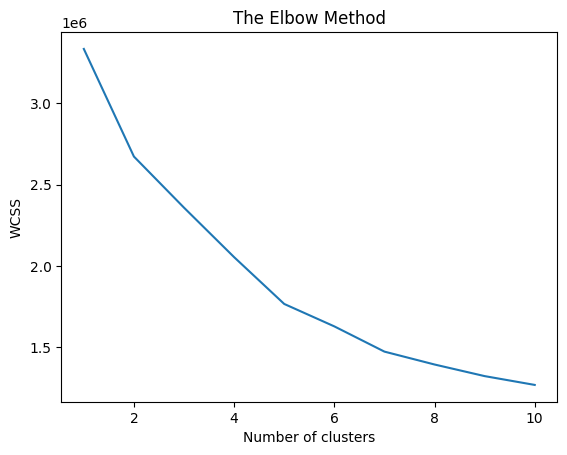

In [64]:

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [69]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


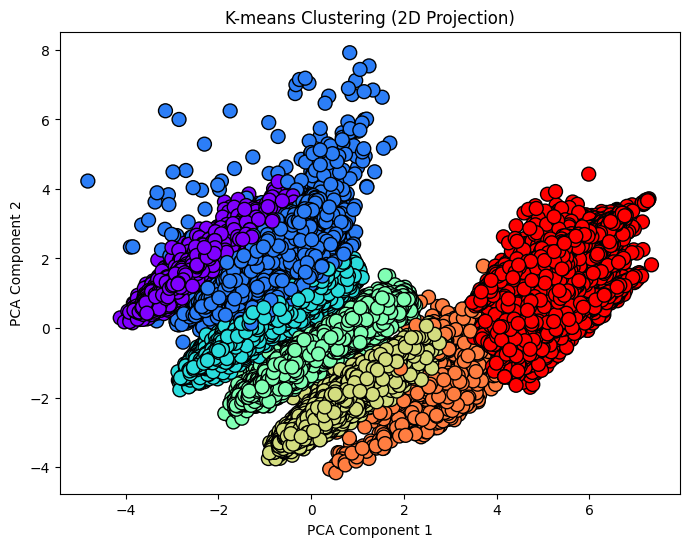

In [71]:
scaled_df['cluster'] = cluster_labels
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Scatter plot to visualize all seven clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=scaled_df['cluster'], cmap='rainbow', edgecolors='k', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (2D Projection)')
plt.show()

In [65]:
# Perform K-means clustering
#n_clusters = 5  # You can choose the number of clusters you want
#kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#cluster_labels = kmeans.fit_predict(scaled_df)
#scaled_df['cluster'] = cluster_labels